In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [2]:
dataset=pd.read_csv("Datasets/TrafficVolumeData.csv")

In [3]:
dataset.head(10)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
5,2012-10-02 14:00:00,NaN,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181
6,2012-10-02 15:00:00,NaN,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584
7,2012-10-02 16:00:00,NaN,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015
8,2012-10-02 17:00:00,NaN,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791
9,2012-10-02 18:00:00,NaN,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4770


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [5]:
dataset_enc = dataset.copy()

In [6]:
le = LabelEncoder()

# cols = ['date_time', 'weather_type', 'weather_description']
cols = ['weather_type', 'weather_description']
for col in cols:
    dataset_enc[col]= le.fit_transform(dataset_enc[col])
    print(le.classes_)

['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm']
['SQUALLS' 'Sky is Clear' 'broken clouds' 'drizzle' 'few clouds' 'fog'
 'freezing rain' 'haze' 'heavy intensity drizzle' 'heavy intensity rain'
 'heavy snow' 'light intensity drizzle' 'light intensity shower rain'
 'light rain' 'light rain and snow' 'light shower snow' 'light snow'
 'mist' 'moderate rain' 'overcast clouds' 'proximity shower rain'
 'proximity thunderstorm' 'proximity thunderstorm with drizzle'
 'proximity thunderstorm with rain' 'scattered clouds' 'shower drizzle'
 'shower snow' 'sky is clear' 'sleet' 'smoke' 'snow' 'thunderstorm'
 'thunderstorm with drizzle' 'thunderstorm with heavy rain'
 'thunderstorm with light drizzle' 'thunderstorm with light rain'
 'thunderstorm with rain' 'very heavy rain']


In [7]:
dataset_enc['is_holiday'] = (dataset_enc['is_holiday'] != 'None').astype(int)

In [8]:
# Convert 'DateTime' to datetime object
dataset_enc['date_time'] = pd.to_datetime(dataset_enc['date_time'])
dataset_enc['hour_of_day'] = dataset_enc['date_time'].dt.hour
dataset_enc['month'] = dataset_enc['date_time'].dt.month
dataset_enc['day'] = dataset_enc['date_time'].dt.day

In [9]:
dataset_enc = dataset_enc.drop('date_time', axis=1)

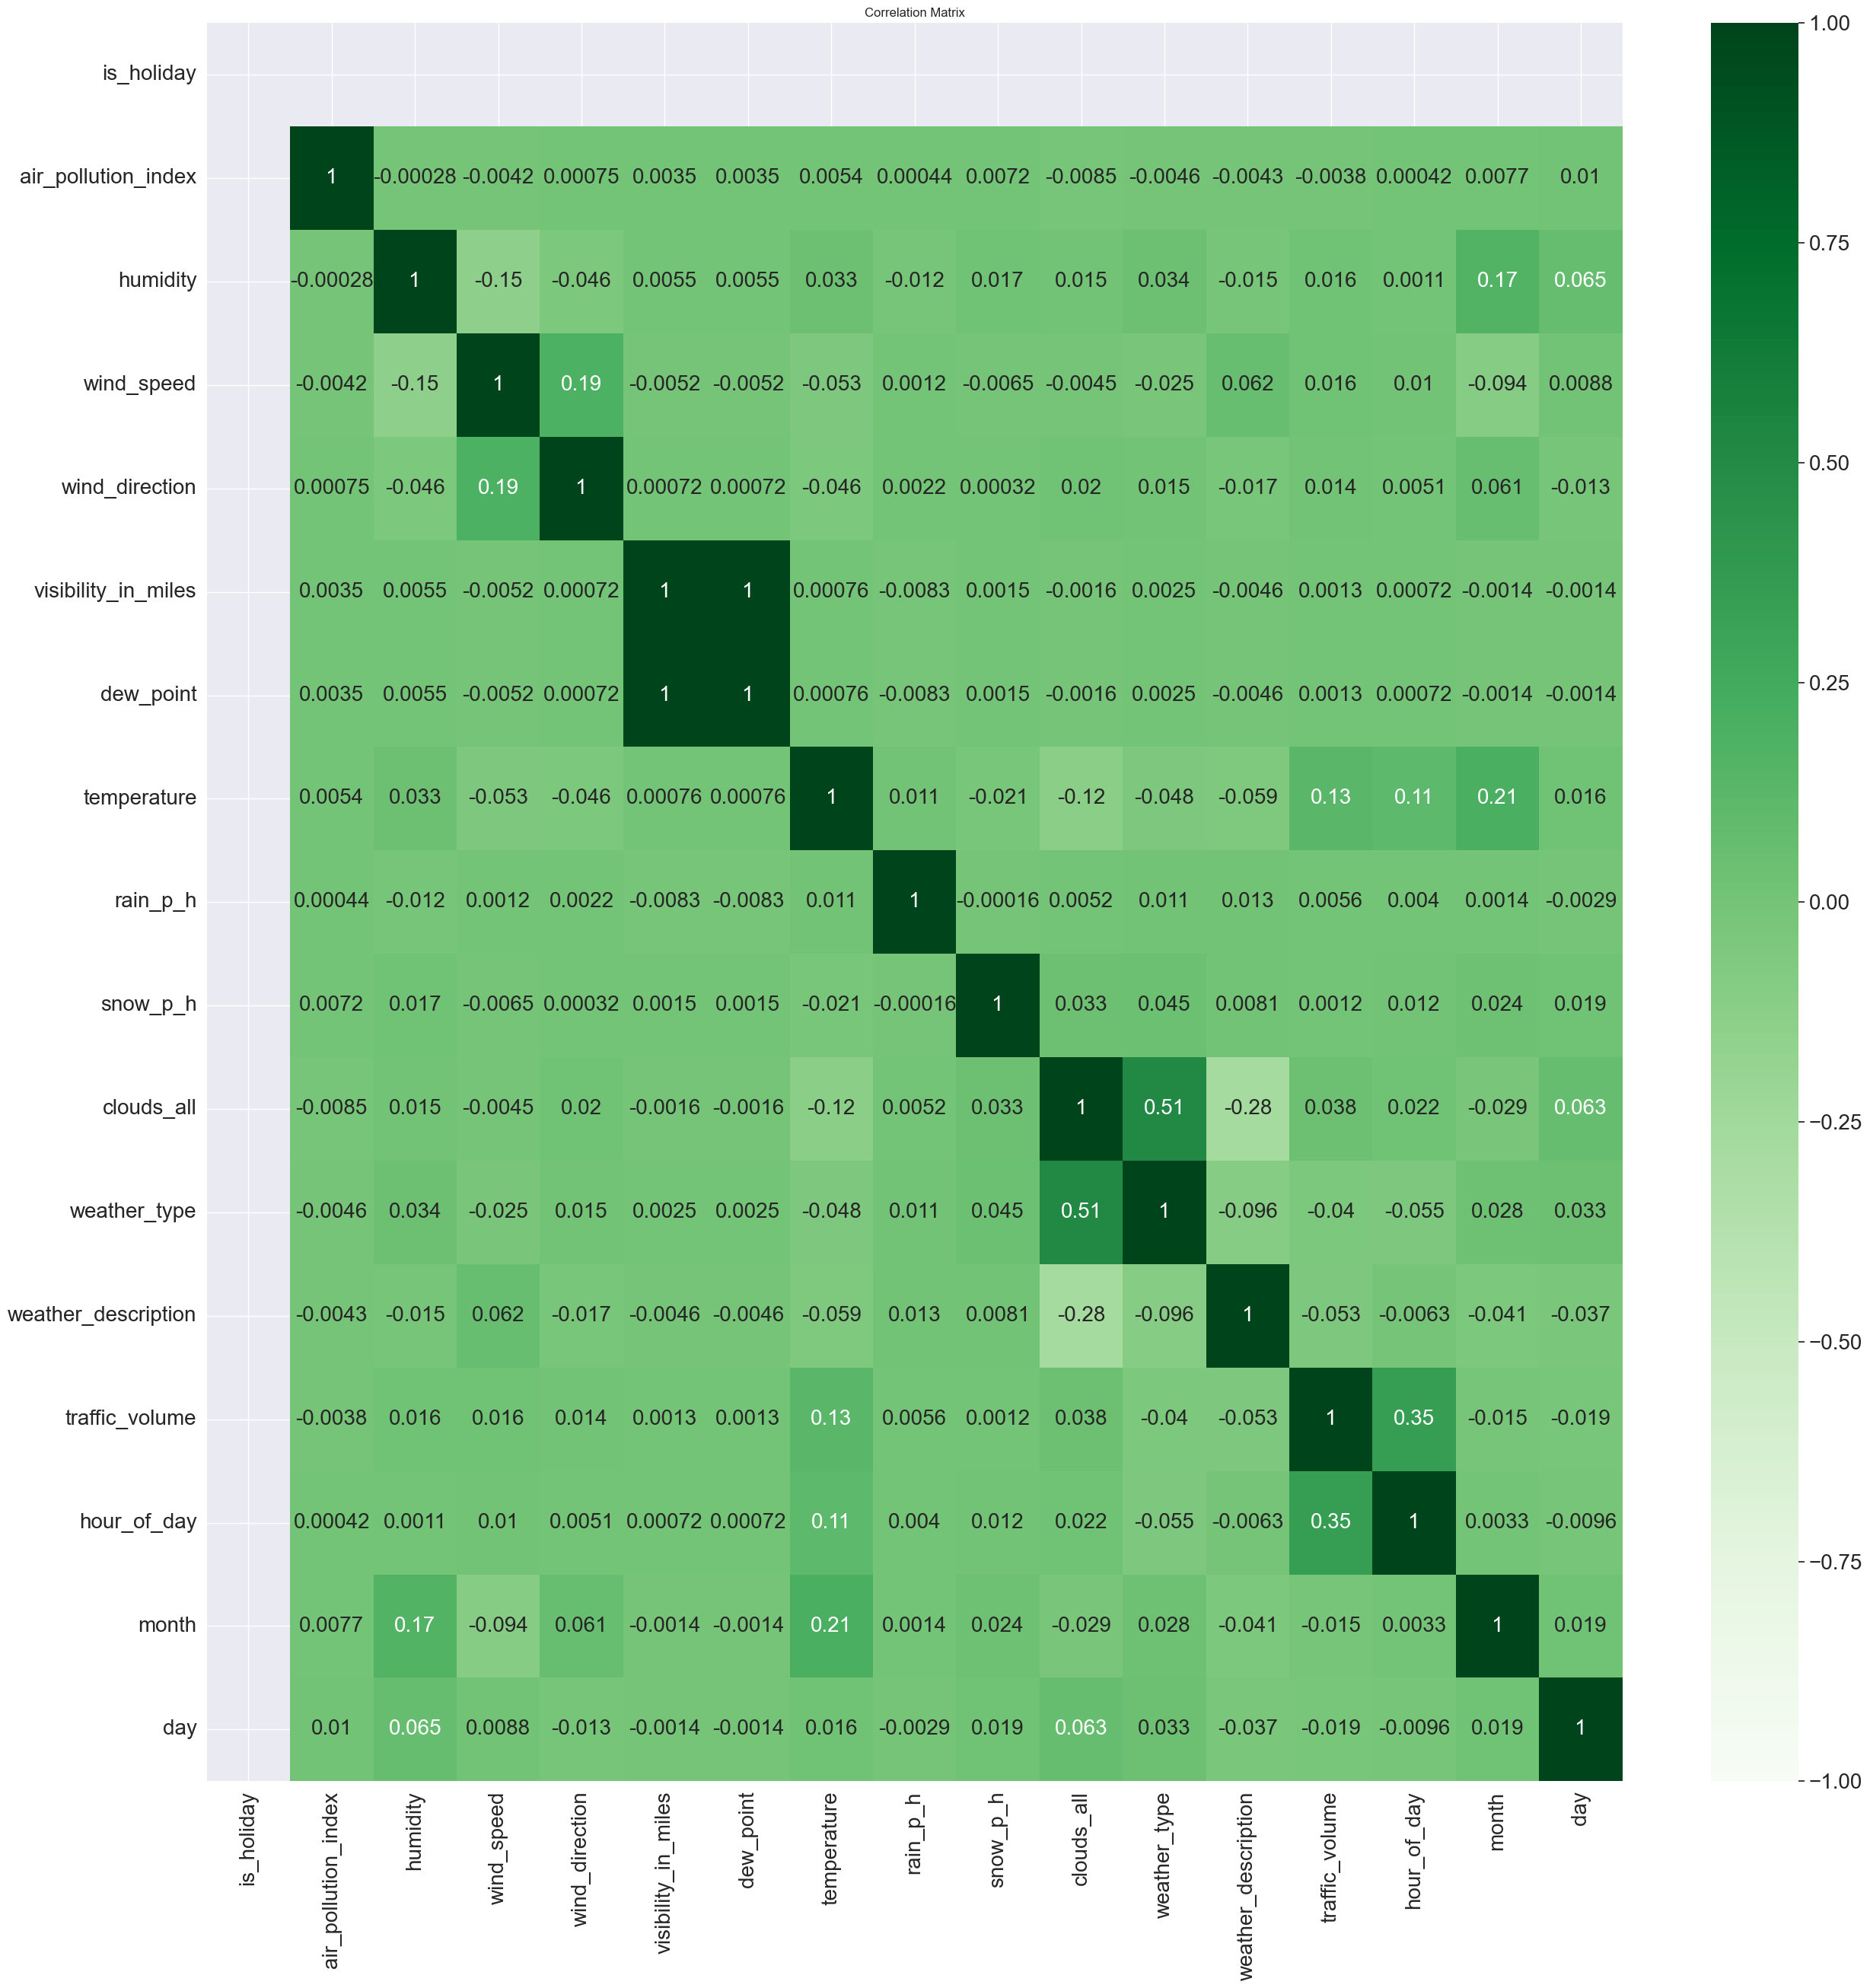

In [10]:
correlation_matrix = dataset_enc.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True,
            cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
dataset_enc = dataset_enc.drop('dew_point', axis=1) # same as visibility_in_miles

# Drop features that have a near zero (0.00x) correlation to the target
dataset_enc = dataset_enc.drop('air_pollution_index', axis=1)
dataset_enc = dataset_enc.drop('snow_p_h', axis=1)
dataset_enc = dataset_enc.drop('rain_p_h', axis=1)
dataset_enc = dataset_enc.drop('visibility_in_miles', axis=1)

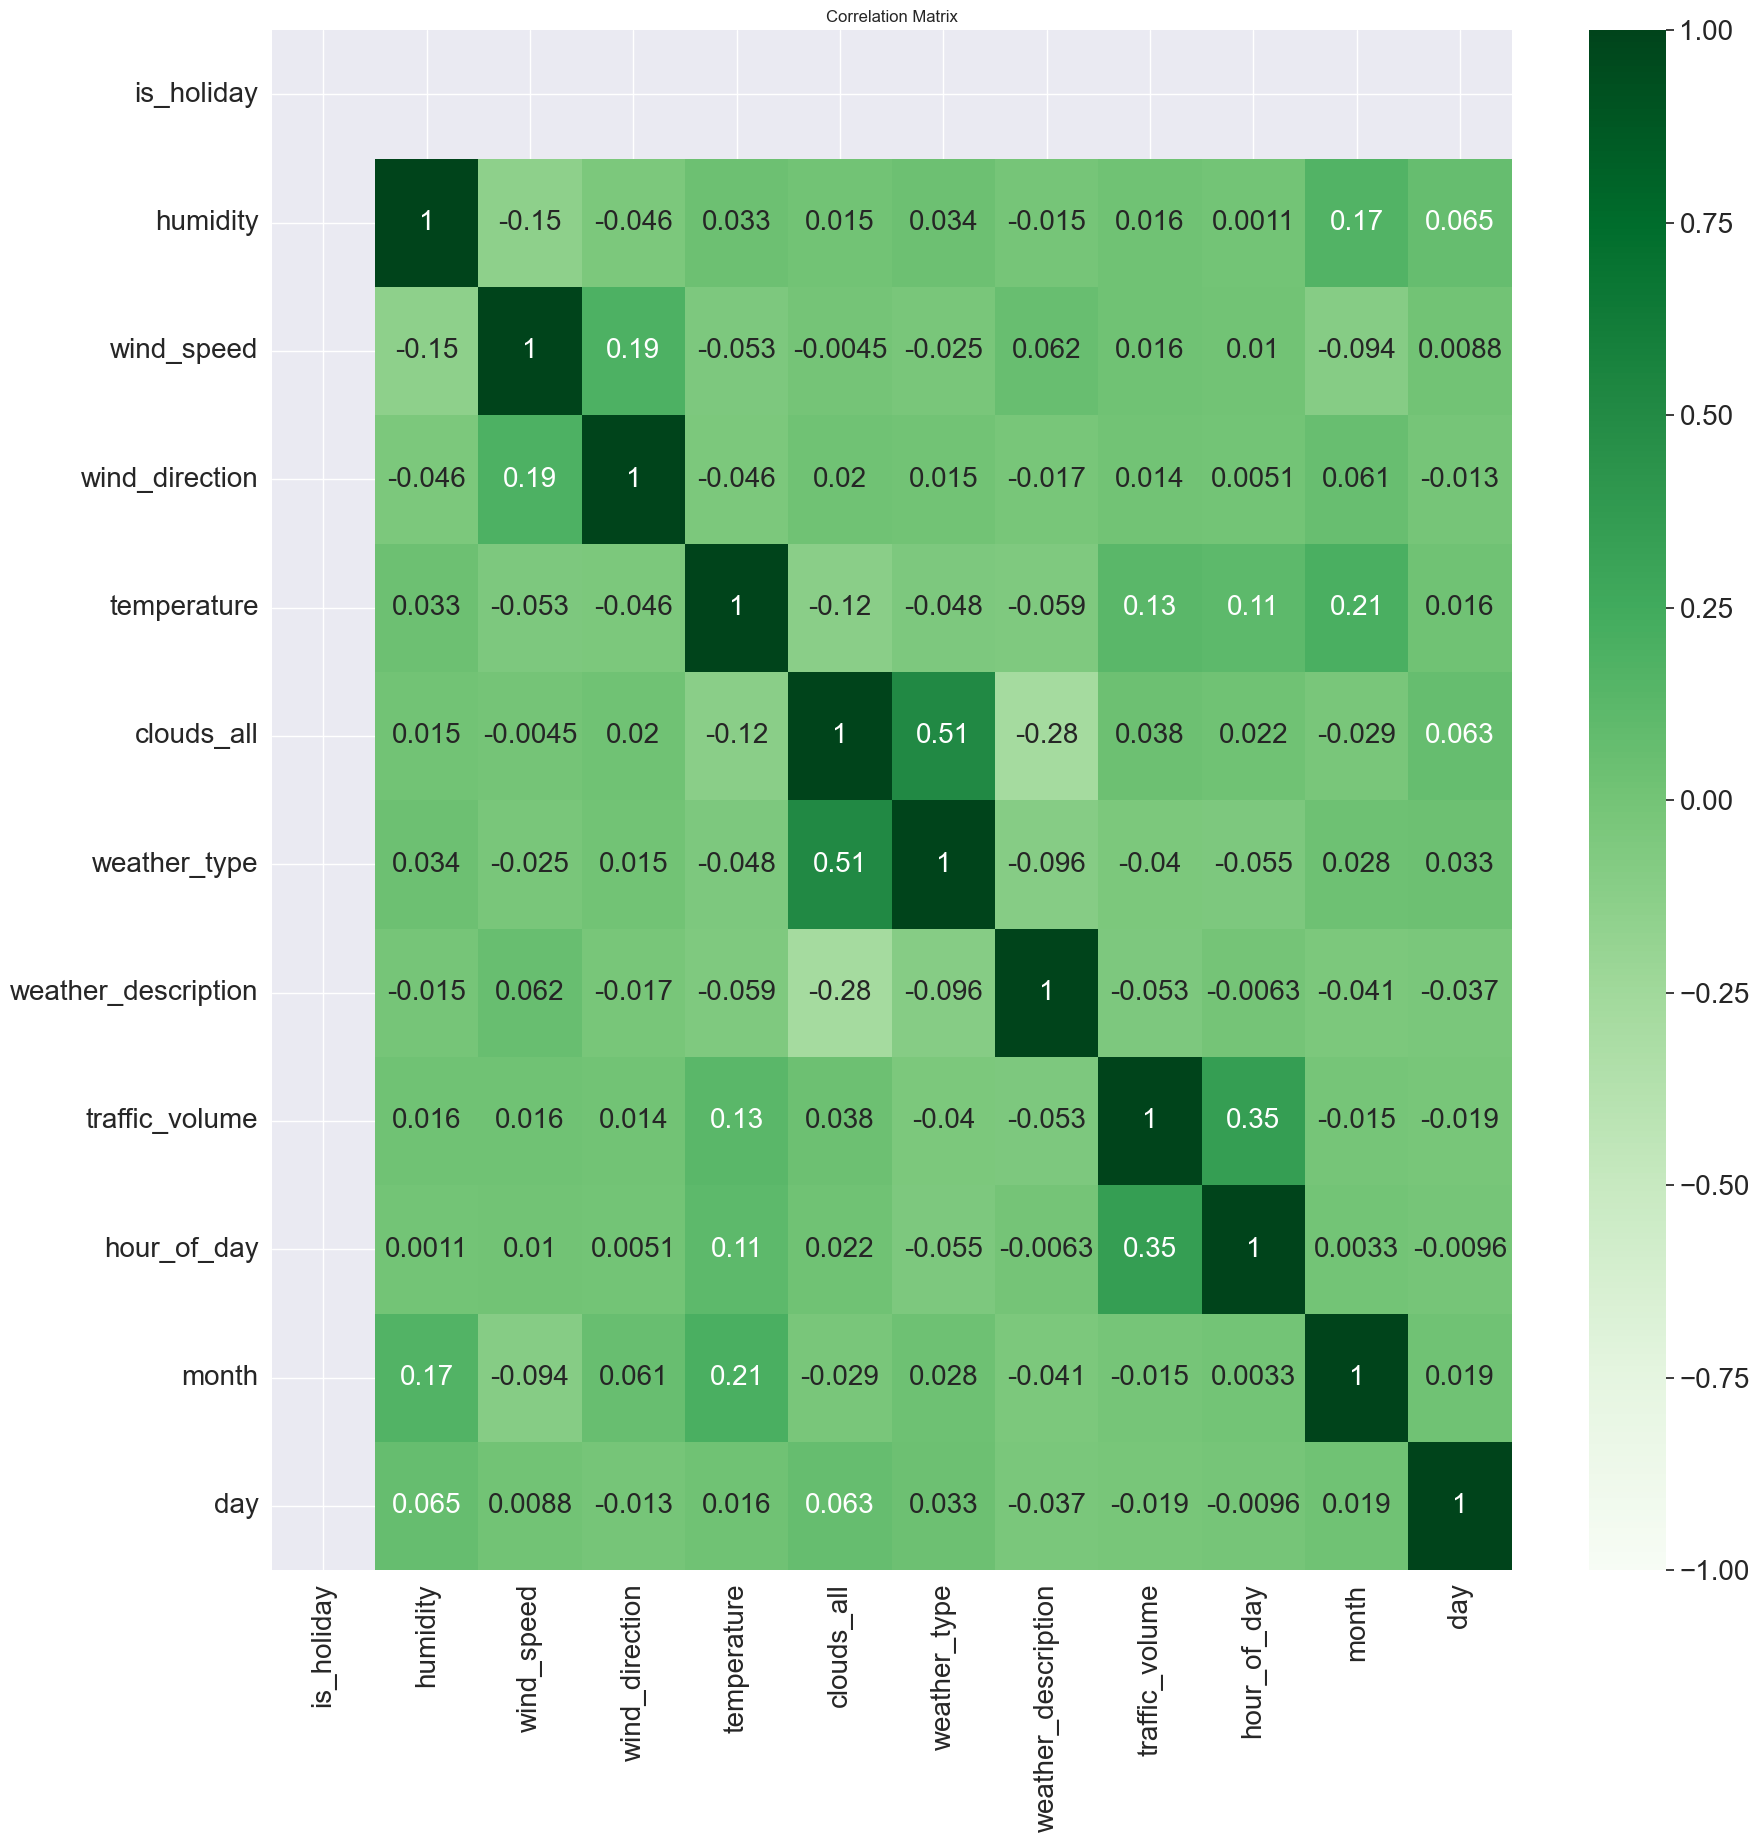

In [12]:
correlation_matrix = dataset_enc.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True,
            cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
dataset_enc.describe()

,is_holiday,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour_of_day,month,day
count,33750.0,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,1.0,71.209007,3.378193,199.471852,280.069587,50.458785,2.520000,15.959170,3240.118163,11.404385,6.407674,15.646874
std,0.0,16.852248,2.055792,99.841088,13.415256,38.871734,2.739005,9.081681,1991.487289,6.951078,3.543241,8.700568
min,1.0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0,60.000000,2.000000,130.000000,271.720000,1.000000,0.000000,7.000000,1165.250000,5.000000,3.000000,8.000000
50%,1.0,72.000000,3.000000,200.000000,280.150000,64.000000,1.000000,17.000000,3335.000000,11.000000,6.000000,16.000000
75%,1.0,85.000000,5.000000,290.000000,290.620000,90.000000,5.000000,24.000000,4926.000000,17.000000,10.000000,23.000000
max,1.0,100.000000,16.000000,360.000000,308.240000,100.000000,10.000000,37.000000,7280.000000,23.000000,12.000000,31.000000


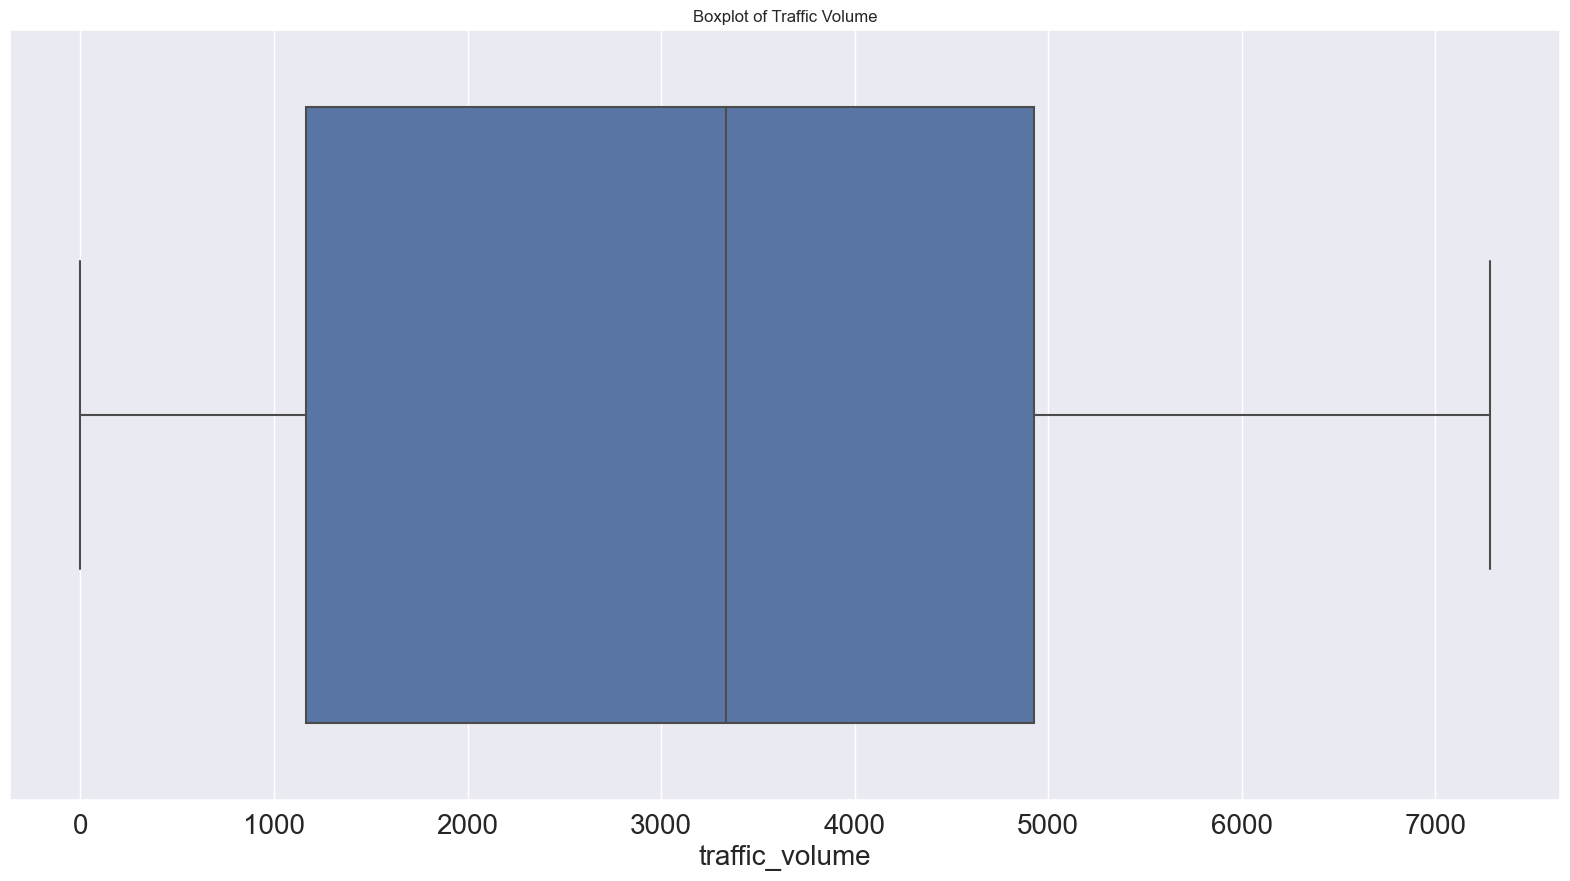

In [14]:
sns.boxplot(x=dataset_enc['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

In [15]:
threshold = 3240 # traffic_volume mean

dataset_enc['traffic_volume'] = (dataset_enc['traffic_volume'] > threshold).astype(int) # 0 - low traffic, 1 - high traffic

In [16]:
dataset_enc.head(10)

,is_holiday,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour_of_day,month,day
0,1,89,2,329,288.28,40,1,24,1,9,10,2
1,1,67,3,330,289.36,75,1,2,1,10,10,2
2,1,66,3,329,289.58,90,1,19,1,11,10,2
3,1,66,3,329,290.13,90,1,19,1,12,10,2
4,1,65,3,329,291.14,75,1,2,1,13,10,2
5,1,65,3,328,291.72,1,0,27,1,14,10,2
6,1,64,3,328,293.17,1,0,27,1,15,10,2
7,1,64,3,327,293.86,1,0,27,1,16,10,2
8,1,63,3,327,294.14,20,1,4,1,17,10,2
9,1,63,3,326,293.10,20,1,4,1,18,10,2


In [17]:
dataset_enc.describe()

,is_holiday,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,weather_description,traffic_volume,hour_of_day,month,day
count,33750.0,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,1.0,71.209007,3.378193,199.471852,280.069587,50.458785,2.520000,15.959170,0.511081,11.404385,6.407674,15.646874
std,0.0,16.852248,2.055792,99.841088,13.415256,38.871734,2.739005,9.081681,0.499885,6.951078,3.543241,8.700568
min,1.0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0,60.000000,2.000000,130.000000,271.720000,1.000000,0.000000,7.000000,0.000000,5.000000,3.000000,8.000000
50%,1.0,72.000000,3.000000,200.000000,280.150000,64.000000,1.000000,17.000000,1.000000,11.000000,6.000000,16.000000
75%,1.0,85.000000,5.000000,290.000000,290.620000,90.000000,5.000000,24.000000,1.000000,17.000000,10.000000,23.000000
max,1.0,100.000000,16.000000,360.000000,308.240000,100.000000,10.000000,37.000000,1.000000,23.000000,12.000000,31.000000


# Predicting Traffic

In [18]:
X = dataset_enc.drop('traffic_volume', axis=1)
t = dataset_enc['traffic_volume']

In [19]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 42)

In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Stochastic Gradient Descent

In [24]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(loss="hinge", penalty="l2")
clf_sgd.fit(X_train, t_train)

SGDClassifier()

In [25]:
y_pred_train = clf_sgd.predict(X_train)
y_pred_test = clf_sgd.predict(X_test)

In [26]:
accuracy_train = accuracy_score(t_train, y_pred_train)
accuracy_test = accuracy_score(t_test, y_pred_test)

print(f'Train Accuracy: {accuracy_train:.2%}')
print(f'Test Accuracy: {accuracy_test:.2%}')

Train Accuracy: 66.91%
Test Accuracy: 66.67%


## K-Nearest Neighbors 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# run KNN on the dataset and find best K by accuracy
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(X_train, t_train)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)


Accuracy score for classification:
gs_neigh_model 0.8404232804232805
best params {'n_neighbors': 18}


We can see that the best `n_neighbors` is `18`.  

In [28]:
knn = KNeighborsClassifier(n_neighbors=18).fit(X_train, t_train)

In [29]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [30]:
accuracy_train = accuracy_score(t_train, y_pred_train)
accuracy_test = accuracy_score(t_test, y_pred_test)

print(f'Train Accuracy: {accuracy_train:.2%}')
print(f'Test Accuracy: {accuracy_test:.2%}')

Train Accuracy: 87.04%
Test Accuracy: 84.88%


## Gradient-Boosted Tree

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X_train, t_train)

In [32]:
y_pred_train = gbdt.predict(X_train)
y_pred_test = gbdt.predict(X_test)

In [33]:
accuracy_train = accuracy_score(t_train, y_pred_train)
accuracy_test = accuracy_score(t_test, y_pred_test)

print(f'Train Accuracy: {accuracy_train:.2%}')
print(f'Test Accuracy: {accuracy_test:.2%}')

Train Accuracy: 92.87%
Test Accuracy: 91.73%
